In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the Dataset

In [ ]:
data=pd.read_csv("loan_data.csv")

In [ ]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Checking for Null Values and Duplicate Values and Filling if any.

In [ ]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In machine learning:

X → input features (age, income, credit score, etc.)

y → output/label (loan approved or not)

So you're preparing the data for something like:

model.fit(X, y)

In [ ]:
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

Categorical columns:

person_gender

person_education

person_home_ownership

loan_intent

previous_loan_defaults_on_file

We convert them into numbers:

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])


In [ ]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


# **Visualizations**

Class Distribution (Loan Status)

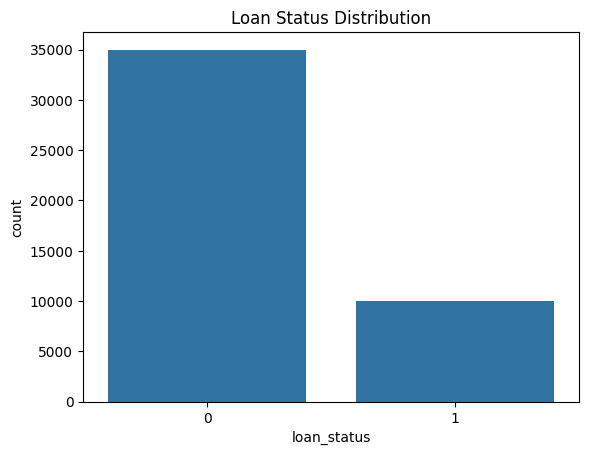

In [ ]:
sns.countplot(x="loan_status", data=data)
plt.title("Loan Status Distribution")
plt.show()


Numerical Feature Distribution

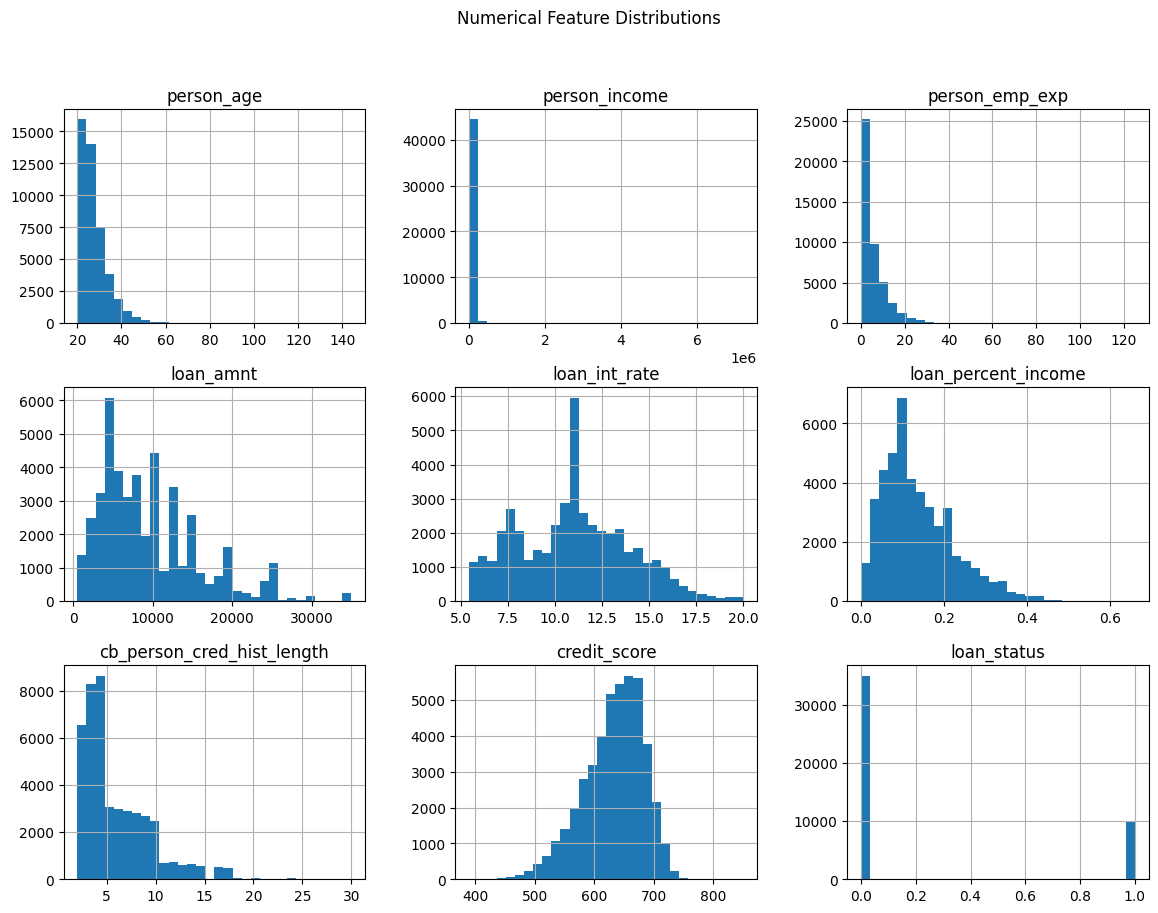

In [ ]:
data.hist(bins=30, figsize=(14,10))
plt.suptitle("Numerical Feature Distributions")
plt.show()


Loan Intent vs Loan Status

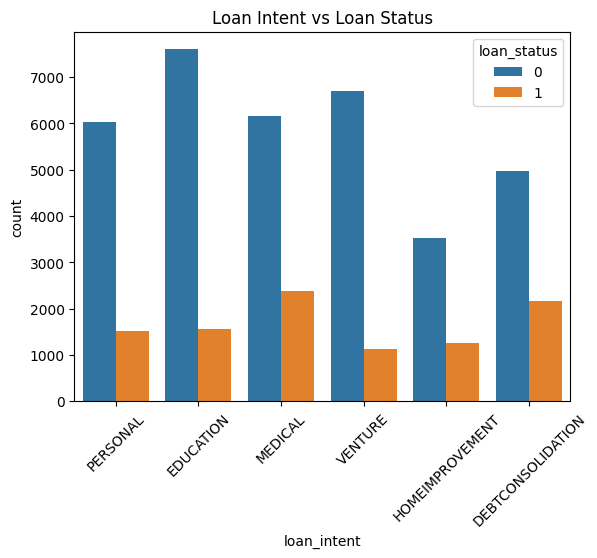

In [ ]:
sns.countplot(x="loan_intent", hue="loan_status", data=data)
plt.xticks(rotation=45)
plt.title("Loan Intent vs Loan Status")
plt.show()


Home Ownership vs Loan Status

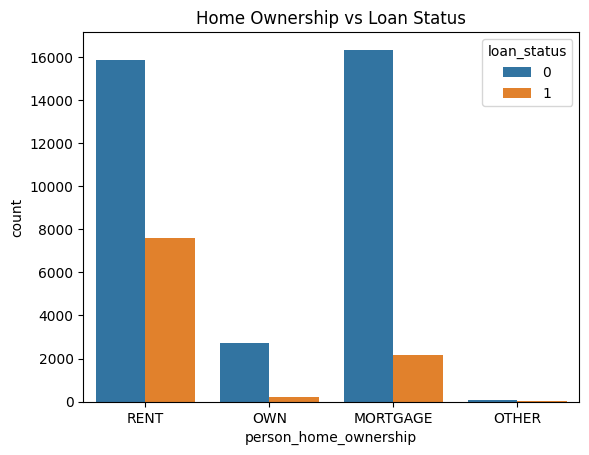

In [ ]:
sns.countplot(x="person_home_ownership", hue="loan_status", data=data)
plt.title("Home Ownership vs Loan Status")
plt.show()


Loan Status vs Income

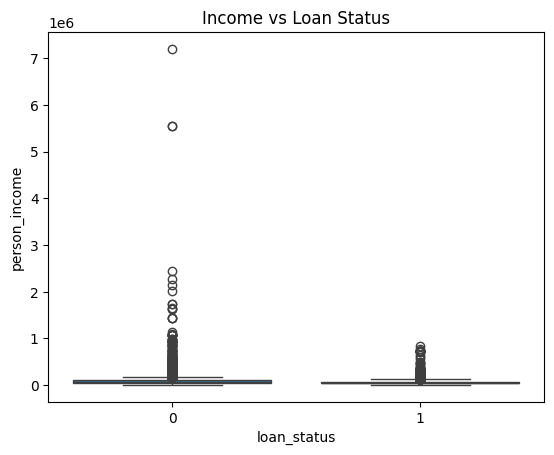

In [ ]:
sns.boxplot(x="loan_status", y="person_income", data=data)
plt.title("Income vs Loan Status")
plt.show()


Correlation Heatmap

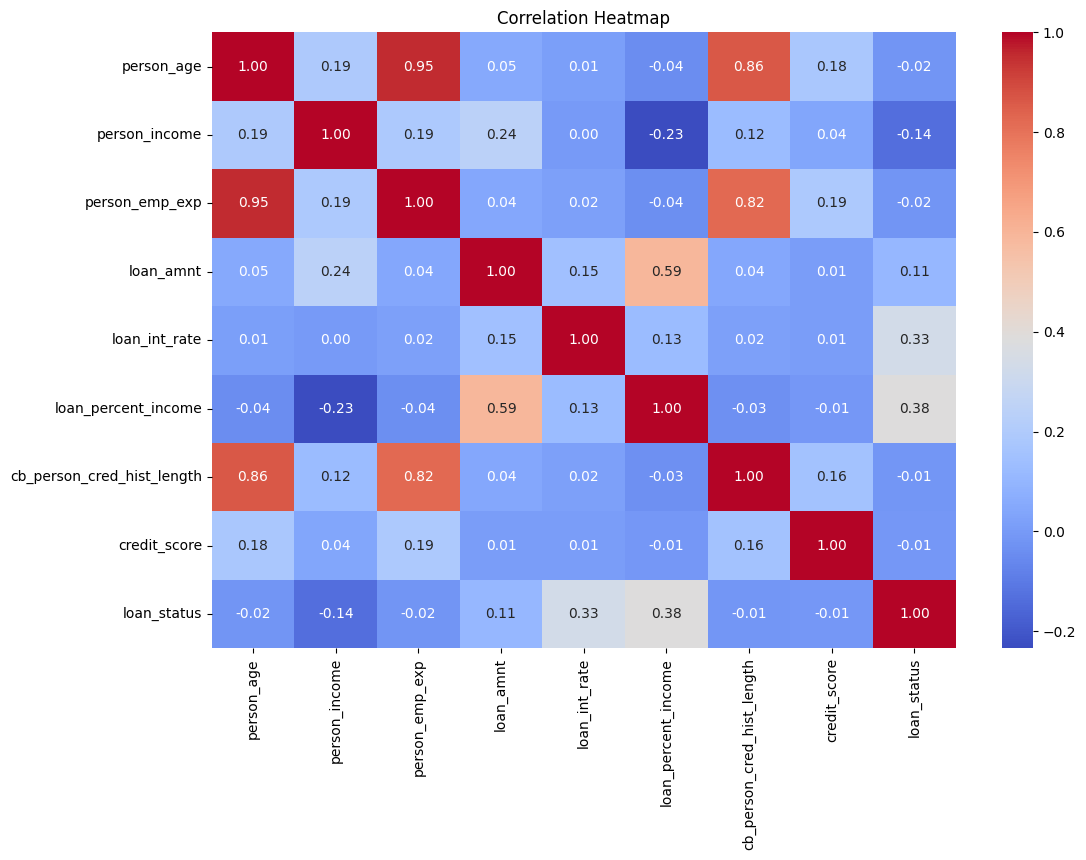

In [ ]:

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **ANN**
ANN Works well when the data is Normalized. So, we will do Feature Scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# Input + Hidden layer 1
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Hidden layer 2
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8512 - loss: 0.3212 - val_accuracy: 0.8936 - val_loss: 0.2233
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8970 - loss: 0.2209 - val_accuracy: 0.8997 - val_loss: 0.2163
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9032 - loss: 0.2119 - val_accuracy: 0.9022 - val_loss: 0.2093
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9043 - loss: 0.2073 - val_accuracy: 0.9069 - val_loss: 0.2073
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9042 - loss: 0.2060 - val_accuracy: 0.9054 - val_loss: 0.2034
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9076 - loss: 0.2003 - val_accuracy: 0.9040 - val_loss: 0.2033
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 0.1982 - val_accuracy: 0.9061 - val_loss: 0.2009
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9114 - loss: 0.1934 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", accuracy)
print("Loss",loss)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9084 - loss: 0.2017
Test Accuracy: 0.9094444513320923
Loss 0.19969061017036438


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[6687  303]
 [ 512 1498]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6990
           1       0.83      0.75      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000

0.9094444444444445


Input layer → 13 features

Hidden layer 1 → 64 neurons (learn complex patterns)

Hidden layer 2 → 32 neurons

Output layer → 1 neuron (probability of loan_status)


**Training vs Validation Accuracy (ANN)**

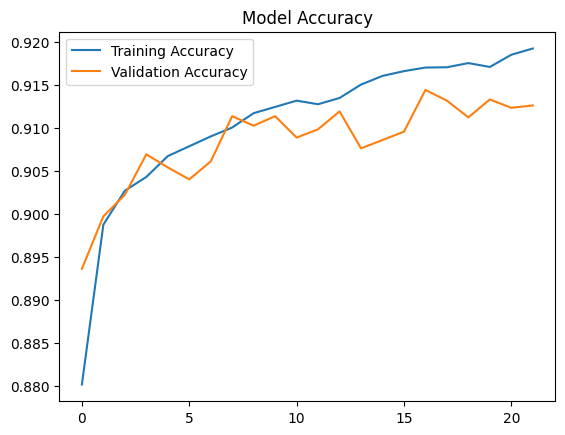

In [ ]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()


**Training vs Validation Loss**

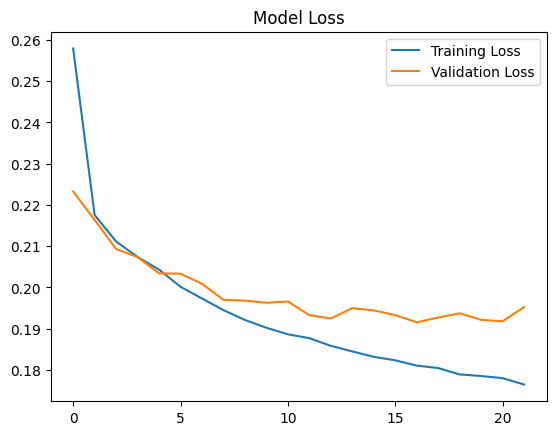

In [ ]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.legend()
plt.show()


**Confusion Matrix Heatmap**

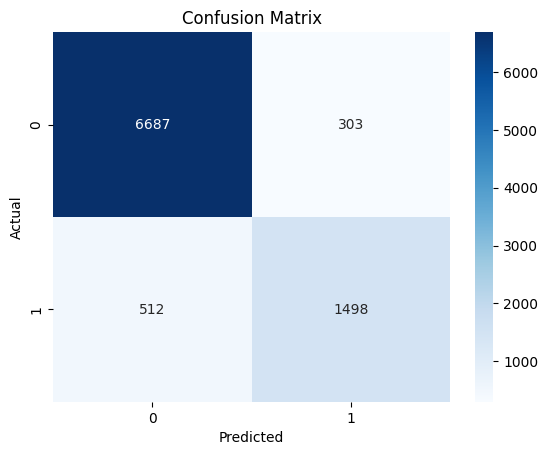

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **Prediction According to heatmap**

In [ ]:
features = [
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
]

X = data[features]
y = data['loan_status']


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=32,
          validation_split=0.2)


Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8036 - loss: 0.4652 - val_accuracy: 0.8413 - val_loss: 0.3749
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 0.3765 - val_accuracy: 0.8389 - val_loss: 0.3711
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8376 - loss: 0.3723 - val_accuracy: 0.8450 - val_loss: 0.3689
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8449 - loss: 0.3627 - val_accuracy: 0.8429 - val_loss: 0.3663
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 0.3597 - val_accuracy: 0.8389 - val_loss: 0.3661
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8473 - loss: 0.3601 - val_accuracy: 0.8426 - val_loss: 0.3643
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8422 - loss: 0.3633 - val_accuracy: 0.8435 - val_loss: 0.3634
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8474 - loss: 0.3572 - val_accuracy: 0.

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)
print("loss",loss)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8485 - loss: 0.3614
Accuracy: 0.8517777919769287
loss 0.3504985570907593


In [ ]:
y_pred=(model.predict(X_test)>0.5).astype(int)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(round(accuracy_score(y_test,y_pred),2))

[[6492  498]
 [ 836 1174]]
0.85


# **User Defined Inputs**

In [ ]:
def predict_loan():

    print("\n========== Loan Prediction ==========\n")

    try:
        loan_amnt = float(input("Enter Loan Amount: "))
        loan_int_rate = float(input("Enter Interest Rate: "))
        loan_percent_income = float(input("Enter Loan Percent Income: "))
    except:
        print("Please enter valid numeric values.")
        return

    user_df = pd.DataFrame([[
        loan_amnt,
        loan_int_rate,
        loan_percent_income
    ]], columns=features)


    user_scaled = scaler.transform(user_df)

    prediction = model.predict(user_scaled, verbose=0)[0][0]

    print(f"\n Approval Probability: {prediction:.2f}")

    if prediction > 0.5:
        print("Loan Approved")
    else:
        print("Loan Not Approved")


In [ ]:
while True:
    predict_loan()

    again = input("\nDo you want to check another applicant? (y/n): ")
    if again.lower() != "y":
        print(" Exiting...")
        break


========== Loan Prediction ==========

Enter Loan Amount: 35000
Enter Interest Rate: 16
Enter Loan Percent Income: 0.56

 Approval Probability: 0.90
Loan Approved

Do you want to check another applicant? (y/n): y

========== Loan Prediction ==========

Enter Loan Amount: 90000
Enter Interest Rate: 12
Enter Loan Percent Income: 0.35

 Approval Probability: 0.05
Loan Not Approved

Do you want to check another applicant? (y/n): n
 Exiting...
